In [1]:
import numpy as np
import pandas as pd

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_val_score, train_test_split

In [2]:
data = pd.read_csv("data/telescope.csv")
X = data.drop(columns="class")
y = data["class"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=13)

In [3]:
ss=StandardScaler().set_output(transform="pandas").fit(X_train)

In [4]:
rf = RandomForestClassifier()
feat_selector = SelectFromModel(rf).fit(ss.transform(X_train), y_train)

In [5]:
feat_selector.get_feature_names_out()

array(['fLength', 'fWidth', 'fSize', 'fAlpha'], dtype=object)

In [6]:
columns = feat_selector.get_feature_names_out()

svm = SVC().fit( ss.transform(X_train)[columns], y_train )

In [8]:
svm.score(ss.transform(X_train)[columns], y_train)

0.8531151419558359

In [9]:
from sklearn.metrics import matthews_corrcoef, ConfusionMatrixDisplay, confusion_matrix

In [10]:
matthews_corrcoef(
    svm.predict(
        ss.transform(X_train)[columns]
    ), y_train
)

0.6713285574899988

In [11]:
preds = svm.predict(
    ss.transform(X_test)[columns]
)

In [12]:
svm.score(ss.transform(X_test)[columns], y_test)

0.8475289169295478

In [13]:
matthews_corrcoef(preds, y_test)

0.6648865528099805

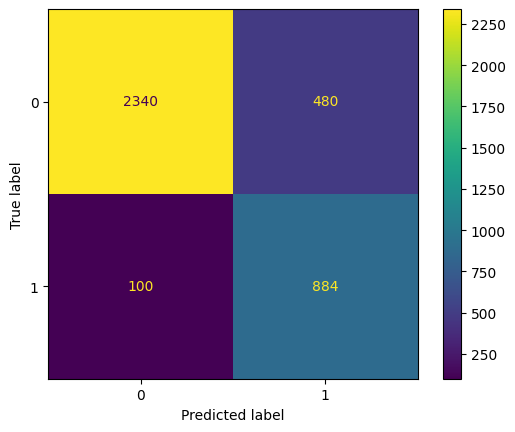

In [14]:
ConfusionMatrixDisplay(
    confusion_matrix(preds, y_test)
).plot()